In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

2025-07-20 18:38:23.978393: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 18:38:24.016613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 18:38:24.017915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-20 18:38:24.735223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train//255.0, x_test//255.0

11490434/11490434 [==============================] - 12s 1us/step


In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

2025-07-20 18:38:55.088423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-20 18:38:55.091702: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist = model.fit(x_train,y_train,epochs = 5, validation_data = (x_test,y_test
                                                                ))

Epoch 1/5


2025-07-20 18:39:06.664232: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 1.8151 - accuracy: 0.3760 - val_loss: 1.6713 - val_accuracy: 0.4060
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6257 - accuracy: 0.4147 - val_loss: 1.6322 - val_accuracy: 0.4158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5896 - accuracy: 0.4234 - val_loss: 1.6263 - val_accuracy: 0.4142
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5678 - accuracy: 0.4297 - val_loss: 1.6190 - val_accuracy: 0.4206
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5509 - accuracy: 0.4359 - val_loss: 1.6171 - val_accuracy: 0.4217


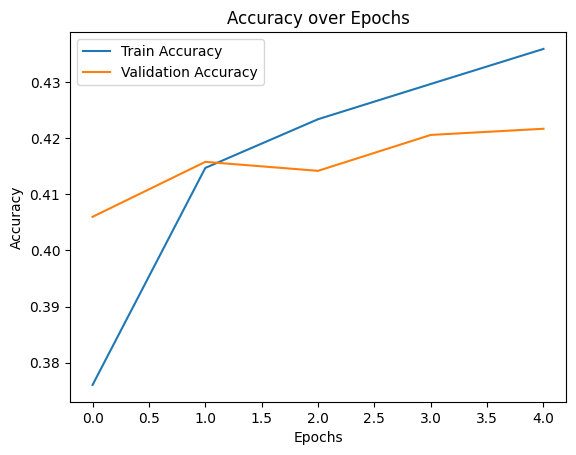

In [8]:
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob,axis = 1)

313/313 [==============================] - 0s 597us/step


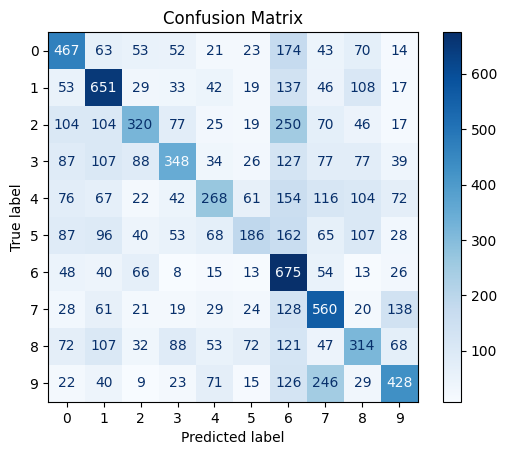

Classification Report
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       980
           1       0.49      0.57      0.53      1135
           2       0.47      0.31      0.37      1032
           3       0.47      0.34      0.40      1010
           4       0.43      0.27      0.33       982
           5       0.41      0.21      0.28       892
           6       0.33      0.70      0.45       958
           7       0.42      0.54      0.48      1028
           8       0.35      0.32      0.34       974
           9       0.51      0.42      0.46      1009

    accuracy                           0.42     10000
   macro avg       0.43      0.42      0.41     10000
weighted avg       0.43      0.42      0.41     10000



In [11]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = np.arange(10))
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Classification Report")
print(classification_report(y_test,y_pred))
